In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from weight_utils import *

## Load pelican weights

In [3]:
in_dir = "/global/ml4hep/spss/twamorkar/PELICAN/predict/"
in_file = "muonlevel1_fix_morestats.best.test.pt"

In [4]:
prob_MC, prob_PD, weight_pelican = getweight_pelican(in_dir+in_file)

## Plot MC and PD probability

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,  4424., 22924., 18178.,
         7663.,  6491.,  5376.,  3820.,  4487.,  5596.,  6556.,  5516.,
         4872.,  3256.,   841.]),
 array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
        0.05050505, 0.06060606, 0.

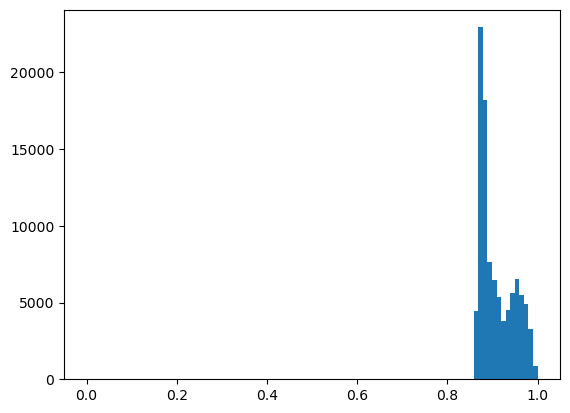

In [5]:
plt.hist(prob_MC, bins=np.linspace(0,1,100))

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.0000e+00, 3.0734e+04, 6.9262e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

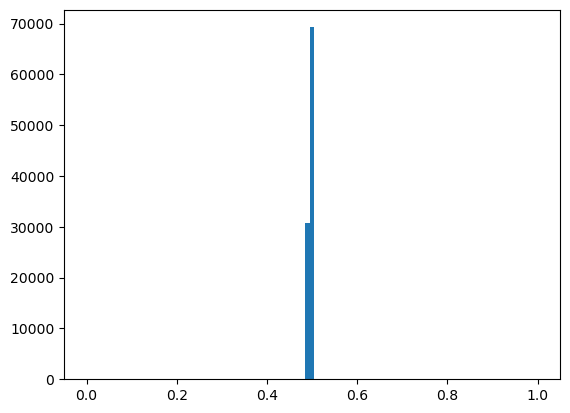

In [6]:
plt.hist(prob_PD, bins=np.linspace(0,1,100))

## Load the test file and get the original weights

In [7]:
## Load testmc
input_testdir = "/global/ml4hep/spss/twamorkar/equivariant_unfolding/scripts/datasets/"
suffix = "muonlevel1_fix_morestats/"
input_testfile = input_testdir+suffix+"test.h5"

In [8]:
weight_original = originalweights(input_testfile)

In [9]:
weight_new = weight_original*weight_pelican

Text(0, 0.5, 'A.U.')

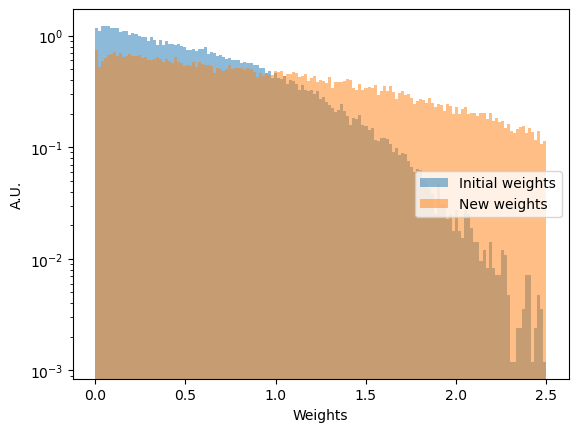

In [10]:
bins = np.linspace(0, 2.5, 150)
plt.hist(weight_original, bins=bins, alpha=0.5, label='Initial weights', density=True)
plt.hist(weight_new, bins=bins, alpha=0.5, label='New weights', density=True)
plt.legend(loc='center right')
plt.yscale('log')
plt.xlabel('Weights')
plt.ylabel('A.U.')

In [11]:
input_testfile=h5py.File(input_testfile,"r")

In [12]:
pt_l1=np.array(input_testfile["pT_l1"])
is_signal=np.array(input_testfile["is_signal"])
pt_l1=pt_l1.squeeze()
pt_l1_mc=pt_l1[is_signal==1]
pt_l1_pd=pt_l1[is_signal==0]

phi_l1=np.array(input_testfile["phi_l1"])
phi_l1=phi_l1.squeeze()
phi_l1_mc=phi_l1[is_signal==1]
phi_l1_pd=phi_l1[is_signal==0]

eta_l1=np.array(input_testfile["eta_l1"])
eta_l1=eta_l1.squeeze()
eta_l1_mc=eta_l1[is_signal==1]
eta_l1_pd=eta_l1[is_signal==0]

mc_px_l1 = pt_l1_mc * np.cos(phi_l1_mc)
pd_px_l1 = pt_l1_pd * np.cos(phi_l1_pd)

mc_py_l1 = pt_l1_mc * np.sin(phi_l1_mc)
pd_py_l1 = pt_l1_pd * np.sin(phi_l1_pd)

mc_pz_l1 = pt_l1_mc * np.sinh(eta_l1_mc)
pd_pz_l1 = pt_l1_pd * np.sinh(eta_l1_pd)

mc_e_l1 = np.sqrt(pt_l1_mc**2 * np.cosh(eta_l1_mc)**2 )
pd_e_l1 = np.sqrt(pt_l1_pd**2 * np.cosh(eta_l1_pd)**2 )
    

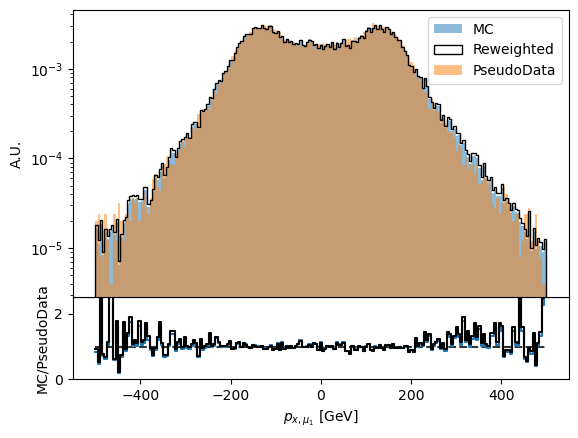

In [13]:
fig = plot_reweighting(np.array(mc_px_l1), np.array(pd_px_l1), source_weight_start=weight_original, source_weight_end=weight_new, bins=np.linspace(-500,500, 200), xlabel=r'$p_{x, \mu_1}$ [GeV]', rlim=[0, 2.5])

In [18]:
fig = plot_reweighting(np.array(mc_px_l2), np.array(pd_px_l2), source_weight_start=weight_original, source_weight_end=weight_new, bins=np.linspace(-500,500, 200), xlabel=r'$p_{x, \mu_2}$ [GeV]', rlim=[0, 2.5])

NameError: name 'mc_px_l2' is not defined

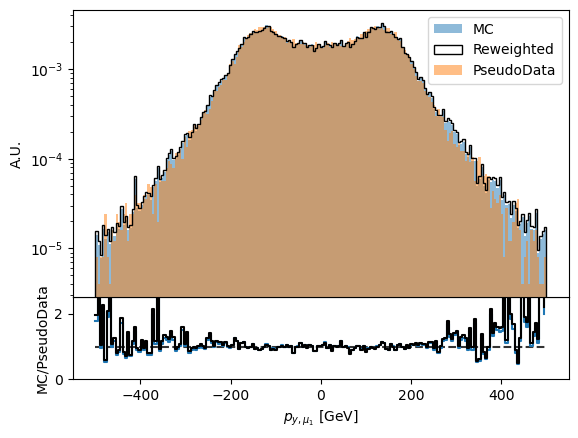

In [14]:
fig = plot_reweighting(np.array(mc_py_l1), np.array(pd_py_l1), source_weight_start=weight_original, source_weight_end=weight_new, bins=np.linspace(-500,500, 200), xlabel=r'$p_{y, \mu_1}$ [GeV]', rlim=[0, 2.5])

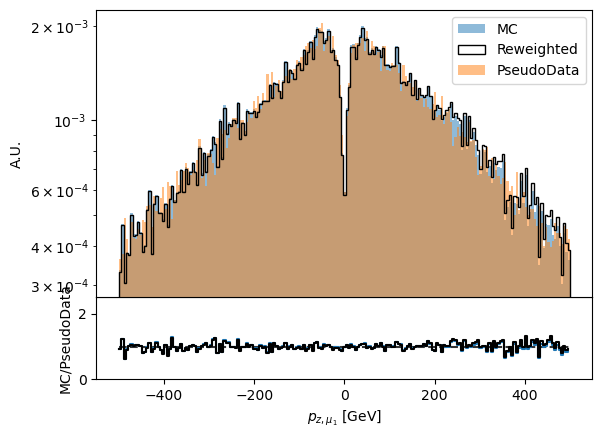

In [15]:
fig = plot_reweighting(np.array(mc_pz_l1), np.array(pd_pz_l1), source_weight_start=weight_original, source_weight_end=weight_new, bins=np.linspace(-500,500, 200), xlabel=r'$p_{z, \mu_1}$ [GeV]', rlim=[0, 2.5])


/global/ml4hep/spss/twamorkar/equivariant_unfolding/scripts/weight_utils.py:75: RuntimeWarning: divide by zero encountered in divide
  axr.plot(bins[:-1], n_mc / n_pd, color='#1f77b4', drawstyle='steps-post')
/global/ml4hep/spss/twamorkar/equivariant_unfolding/scripts/weight_utils.py:75: RuntimeWarning: invalid value encountered in divide
  axr.plot(bins[:-1], n_mc / n_pd, color='#1f77b4', drawstyle='steps-post')
/global/ml4hep/spss/twamorkar/equivariant_unfolding/scripts/weight_utils.py:77: RuntimeWarning: divide by zero encountered in divide
  axr.plot(bins[:-1], n_rw / n_pd, color='k', drawstyle='steps-post')
/global/ml4hep/spss/twamorkar/equivariant_unfolding/scripts/weight_utils.py:77: RuntimeWarning: invalid value encountered in divide
  axr.plot(bins[:-1], n_rw / n_pd, color='k', drawstyle='steps-post')


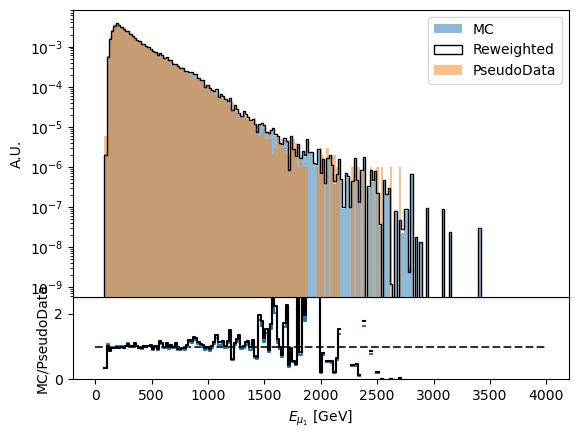

In [16]:
fig = plot_reweighting(np.array(mc_e_l1), np.array(pd_e_l1), source_weight_start=weight_original, source_weight_end=weight_new, bins=np.linspace(0,4000, 200), xlabel=r'$E_{\mu_1}$ [GeV]', rlim=[0, 2.5])


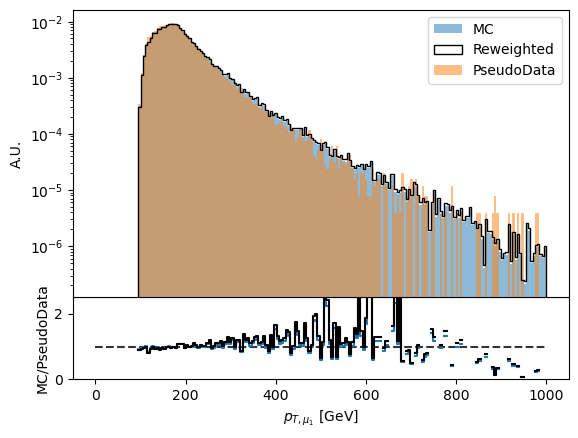

In [17]:
fig = plot_reweighting(np.array(pt_l1_mc), np.array(pt_l1_pd), source_weight_start=weight_original, source_weight_end=weight_new, bins=np.linspace(0, 1e3, 200), xlabel=r'$p_{T, \mu_1}$ [GeV]', rlim=[0, 2.5])


/global/ml4hep/spss/twamorkar/equivariant_unfolding/scripts/weight_utils.py:75: RuntimeWarning: divide by zero encountered in divide
  axr.plot(bins[:-1], n_mc / n_pd, color='#1f77b4', drawstyle='steps-post')
/global/ml4hep/spss/twamorkar/equivariant_unfolding/scripts/weight_utils.py:75: RuntimeWarning: invalid value encountered in divide
  axr.plot(bins[:-1], n_mc / n_pd, color='#1f77b4', drawstyle='steps-post')
/global/ml4hep/spss/twamorkar/equivariant_unfolding/scripts/weight_utils.py:77: RuntimeWarning: divide by zero encountered in divide
  axr.plot(bins[:-1], n_rw / n_pd, color='k', drawstyle='steps-post')
/global/ml4hep/spss/twamorkar/equivariant_unfolding/scripts/weight_utils.py:77: RuntimeWarning: invalid value encountered in divide
  axr.plot(bins[:-1], n_rw / n_pd, color='k', drawstyle='steps-post')


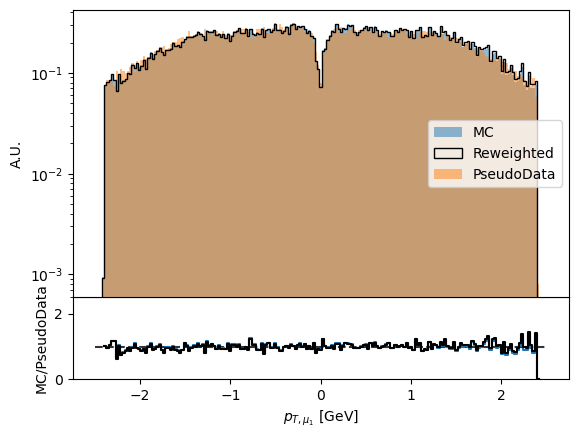

In [19]:
fig = plot_reweighting(np.array(eta_l1_mc), np.array(eta_l1_pd), source_weight_start=weight_original, source_weight_end=weight_new, bins=np.linspace(-2.5, 2.5, 200), xlabel=r'$p_{T, \mu_1}$ [GeV]', rlim=[0, 2.5])
